In [8]:

import os
import re
from datetime import datetime
from itertools import (combinations, combinations_with_replacement,
                       permutations, product)

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.linalg as la
import scipy.sparse as sp
import seaborn as sns
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import (beta, binom, dirichlet, expon, lognorm,
                         multivariate_normal, norm, pareto)
from tqdm import notebook, trange
import pickle 

pd.set_option('display.max_columns', None)

In [10]:
current_directory = os.getcwd()
parent_directory = os.path.dirname(current_directory)
sys.path.append(parent_directory)
if parent_directory not in sys.path:
    sys.path.append(parent_directory)
from config import directory_path
os.chdir(directory_path)
os.getcwd()



'/mnt/ide0/home/nadavkunievsky/uncertainty_costs'

# Plotting Uncertainty

In [45]:
with open('proc_data/temps'  + '/uncertaintyMeasuresbasicModel_1202023_all.pkl', 'rb') as f:
    unCosts = pickle.load(f)


# Aggregate Cost to Everyone

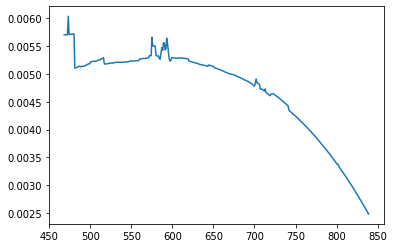

In [46]:
costsByAge_all = [(i[0],i[1][0]) for i in unCosts]
costsByAge = np.array(costsByAge_all)
plt.plot(costsByAge[:,0],costsByAge[:,1])


# Cost by Caste

In [17]:
costsi = [[i[0],i[-1],i[1][1]] for i in unCosts]

resCount = np.empty(shape=(0,5)) 
resUC = np.empty(shape=(0,5)) 
for ai,a in enumerate(costsi):
    groups = a[1]
    unCostsi = a[2]
    groupi = np.argmax(groups,axis=1)
    table = np.concatenate((groupi.reshape(-1,1),unCostsi.reshape(-1,1)),axis=1)
    casts = [0,1,2,3]
    resVec = np.zeros((1,len(casts)+1))
    resVec[:,0] = a[0]
    resVecCount = np.zeros((1,len(casts)+1))
    resVecCount[:,0] = a[0]
    for gi,g in enumerate(casts):
        resVec[0,gi+1] = table[table[:,0]==g,1].mean()
        resVecCount[0,gi+1] = np.sum(table[:,0]==g)
    resUC= np.concatenate((resUC,resVec),axis=0)
    resCount= np.concatenate((resCount,resVecCount),axis=0)
    

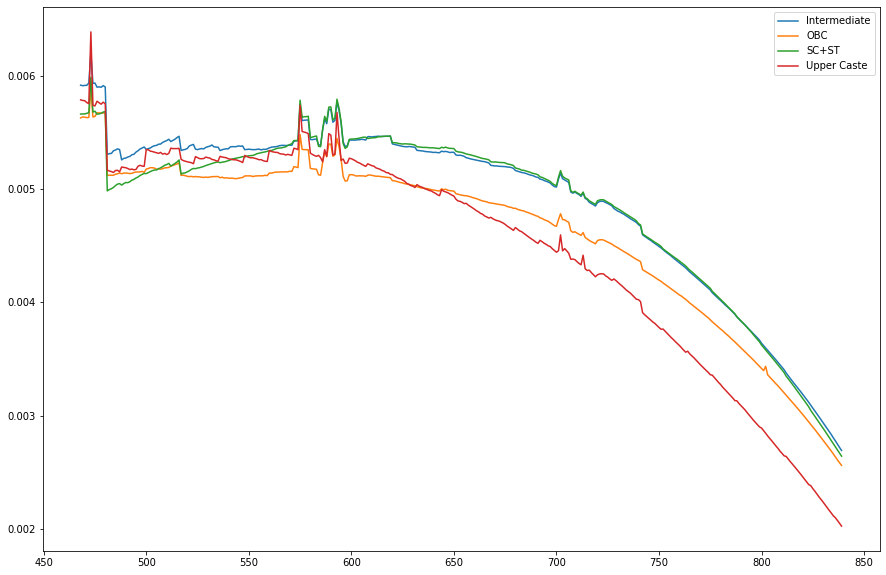

In [23]:
# Set the size of the graph (optional)
plt.figure(figsize=(15, 10))
plt.plot(resUC[:,0], resUC[:,1], label="Intermediate")
plt.plot(resUC[:,0], resUC[:,2], label="OBC")
plt.plot(resUC[:,0], resUC[:,3], label="SC+ST")
plt.plot(resUC[:,0], resUC[:,4], label="Upper Caste")
plt.legend()
plt.show()
